In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

In [46]:
df = pd.read_csv('G:\CHETAN\Assignments\Decision tree\Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [47]:
df1 = df.copy()
df1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [48]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [49]:
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [51]:
df2=df1.rename(columns={"Marital.Status": "maritalstatus", "Taxable.Income": "taxable_income","City.Population": "city_population","Work.Experience": "work_experience"})

In [52]:
df2.head()

,Undergrad,maritalstatus,taxable_income,city_population,work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [53]:
label_encoding =LabelEncoder()
df2['Urban']= label_encoding.fit_transform(df2['Urban'])
df2['Undergrad']= label_encoding.fit_transform(df2['Undergrad'])
df2['maritalstatus']= label_encoding.fit_transform(df2['maritalstatus'])

In [54]:
df2.maritalstatus.unique()
df2.maritalstatus.value_counts()

2    217
1    194
0    189
Name: maritalstatus, dtype: int64

<AxesSubplot:>

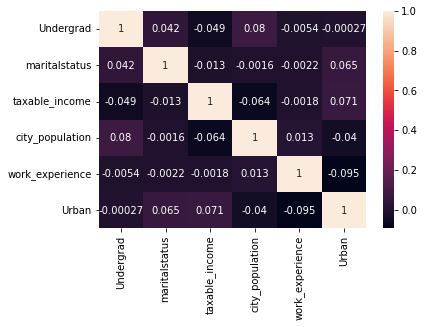

In [55]:
corr=df2.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=True)

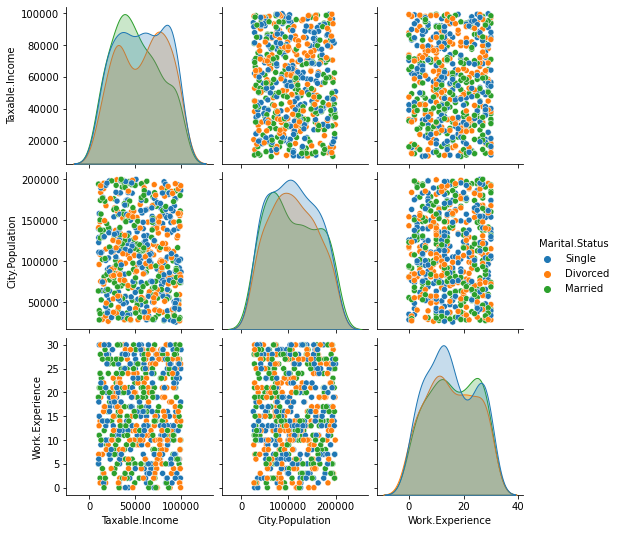

In [56]:
sns.pairplot(data=df1, hue ='Marital.Status')

In [57]:
df2.head()

,Undergrad,maritalstatus,taxable_income,city_population,work_experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [58]:
# Categorising Sales based on 'High'(>=30000) and 'low'(<30000)

taxable_income_val=[]
for value in df2['taxable_income']:
    if value >= 30000:
        taxable_income_val.append('High')
    else:
        taxable_income_val.append('Low')
df2['taxable_income_category']=(taxable_income_val)
df2.head()

,Undergrad,maritalstatus,taxable_income,city_population,work_experience,Urban,taxable_income_category
0,0,2,68833,50047,10,1,High
1,1,0,33700,134075,18,1,High
2,0,1,36925,160205,30,1,High
3,1,2,50190,193264,15,1,High
4,0,1,81002,27533,28,0,High


In [59]:
df2.taxable_income_category.value_counts()

High    476
Low     124
Name: taxable_income_category, dtype: int64

In [60]:
df3= df2.drop(columns='taxable_income',axis=1)

In [61]:
x=df3.iloc[:,0:5]
y=df3['taxable_income_category']
x

,Undergrad,maritalstatus,city_population,work_experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
y_train.value_counts()

High    358
Low      92
Name: taxable_income_category, dtype: int64

In [72]:
from sklearn.model_selection import KFold,cross_val_score
kfold = KFold(n_splits=10,random_state=7,shuffle=True)

model = RandomForestClassifier(n_estimators=100, max_features=4)
model.fit(x_train, y_train)
results = cross_val_score(model,x,y, cv=kfold)
print(results.mean())

0.7449999999999999


In [73]:
results_train = cross_val_score(model, x_train, y_train, cv=kfold)
results_train.mean()

0.7511111111111111

In [74]:
results_test = cross_val_score(model, x_test, y_test, cv=kfold)
results_test.mean()

0.7466666666666667

In [75]:
pred_train = model.predict(x_train)
accuracy_score(y_train,pred_train)

1.0

In [76]:
confusion_matrix(y_train,pred_train)

array([[358,   0],
       [  0,  92]], dtype=int64)

In [77]:
pred_test = model.predict(x_test)
accuracy_score(y_test,pred_test)

0.7466666666666667

In [78]:
confusion_matrix(y_test,pred_test)

array([[110,   8],
       [ 30,   2]], dtype=int64)

In [79]:
model.feature_importances_

array([0.04023476, 0.08258565, 0.56505905, 0.26013314, 0.0519874 ])

In [81]:
feature=pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
feature

,feature,importance
2,city_population,0.565059
3,work_experience,0.260133
1,maritalstatus,0.082586
4,Urban,0.051987
0,Undergrad,0.040235
